In [140]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [141]:
DF=pd.read_csv('Retail Store Sales Transactions dataset.csv')

In [142]:
DF.shape

(131706, 8)

In [143]:
DF.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88


In [144]:
#Check if any nulls valvues exist in the dataset
DF.isnull().values.any()

False

In [145]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      131706 non-null  int64  
 1   Date            131706 non-null  object 
 2   Customer_ID     131706 non-null  int64  
 3   Transaction_ID  131706 non-null  int64  
 4   SKU_Category    131706 non-null  object 
 5   SKU             131706 non-null  object 
 6   Quantity        131706 non-null  float64
 7   Sales_Amount    131706 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 8.0+ MB


In [146]:
# Check for duplicate rows
DF.duplicated().sum()

0

In [147]:
DF.value_counts()

Unnamed: 0  Date        Customer_ID  Transaction_ID  SKU_Category  SKU    Quantity  Sales_Amount
1           02/01/2016  2547         1               X52           0EM7L  1.0       3.13            1
87847       28/09/2016  10373        47000           N8U           JJLXQ  2.0       9.54            1
87813       28/09/2016  7780         46979           1EO           57BHI  2.0       22.00           1
87812       28/09/2016  16677        46978           L9F           5VLRF  1.0       16.56           1
87811       28/09/2016  16677        46978           L9F           10ZNC  1.0       12.79           1
                                                                                                   ..
43898       04/05/2016  13874        21716           FU5           6TXTJ  2.0       2.59            1
43897       04/05/2016  13874        21716           IEV           KRX6I  2.0       3.53            1
43896       04/05/2016  13874        21716           LDZ           IRQZ4  1.0       36.

In [148]:
#Quantity and Sales basic statistic
DF.describe()

,Unnamed: 0,Customer_ID,Transaction_ID,Quantity,Sales_Amount
count,131706.000000,131706.000000,131706.000000,131706.000000,131706.000000
mean,65853.500000,12386.450367,32389.604187,1.485311,11.981524
std,38020.391614,6086.447552,18709.901238,3.872667,19.359699
min,1.000000,1.000000,1.000000,0.010000,0.020000
25%,32927.250000,7349.000000,16134.000000,1.000000,4.230000
50%,65853.500000,13496.000000,32620.000000,1.000000,6.920000
75%,98779.750000,17306.000000,48548.000000,1.000000,12.330000
max,131706.000000,22625.000000,64682.000000,400.000000,707.730000


In [149]:
# View all unique values in 'SKU_Category'
DF['SKU_Category'].unique()

array(['X52', '2ML', '0H2', 'JPI', 'XG4', 'FEW', 'N5F', 'H8O', 'N8U',
       'JR5', 'I4Y', 'YMJ', 'P42', 'SFC', '7C6', 'OQA', 'TW8', 'Q4N',
       'H15', 'F9B', 'C8Z', 'BR0', 'R6E', 'LIB', 'OXH', '29A', 'FZT',
       'T80', 'EPM', 'JKC', 'O38', 'Z4O', 'QV7', 'QCG', 'OBD', 'JI5',
       'FU5', '8HU', 'EMC', '0WT', 'BZU', '1TS', '3WV', 'J4R', 'A38',
       'AEB', 'QLB', '2O0', '8H8', '0KX', 'TVL', 'SJS', '9ZX', 'LPF',
       'IEV', 'DMA', 'LGI', 'C3R', '1VL', 'DJI', 'PA3', '1L6', 'GSI',
       'PZW', 'R6B', '6BZ', 'NVL', 'LSD', 'MU3', 'HVP', 'H1H', 'TIF',
       'TZB', 'BEQ', '01F', 'ILF', 'EKM', 'U5F', 'RU6', 'XVK', 'JB0',
       'CQK', 'LDZ', 'B93', 'WHL', '56W', 'I3L', 'NTA', 'MOE', 'V9H',
       'OWA', '4ZE', '2K4', 'DGB', 'FUA', '1EO', 'TEU', 'Z23', '2LA',
       '69K', 'GGP', 'L28', '69B', 'HTR', 'RML', 'M7X', 'PHK', 'MTR',
       'SIM', 'ARZ', 'PBV', 'VQD', '8LP', 'C3Y', 'FDS', 'FYD', 'VW7',
       'A0G', 'W41', 'LRR', 'Z99', 'XX1', '06Z', '4Y8', 'XAE', 'L9F',
       'NX3', 'ZYU',

In [150]:
#How many unique category are there? 
DF['SKU_Category'].nunique()

187

In [151]:
#Check zero or negative values
DF[(DF['Quantity'] <= 0) | (DF['Sales_Amount'] <= 0)]


,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount


### Observations from Initial EDA
- This is a retail sales dataset.
- The first column appears to be just a row index and does not add analytical value.
- There are no null values in the dataset.
- No zero or negative values. 
- The average quantity sold per transaction is around 1.5.
- I plan to add a calculated column called **'Unit Price'** (`Sales Amount / Quantity Sold`).
- It will be interesting to analyze the number of sales per category.
- Overall, the dataset appears clean and ready for analysis.

In [152]:
#Create a copy
df_copy=DF.copy()

In [153]:
# Convert 'Date' column to datetime format
df_copy['Date'] = pd.to_datetime(df_copy['Date'], errors='coerce')

C:\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/01/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/01/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/01/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/01/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

In [154]:
# Check if conversion worked
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Unnamed: 0      131706 non-null  int64         
 1   Date            131706 non-null  datetime64[ns]
 2   Customer_ID     131706 non-null  int64         
 3   Transaction_ID  131706 non-null  int64         
 4   SKU_Category    131706 non-null  object        
 5   SKU             131706 non-null  object        
 6   Quantity        131706 non-null  float64       
 7   Sales_Amount    131706 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 8.0+ MB


In [155]:
# Create Price per Unit column
df_copy['Price_per_Unit'] = df_copy['Sales_Amount'] / df_copy['Quantity']

In [156]:
# Quick check
df_copy[['Sales_Amount', 'Quantity', 'Price_per_Unit']].head()

,Sales_Amount,Quantity,Price_per_Unit
0,3.13,1.0,3.13
1,5.46,1.0,5.46
2,6.35,1.0,6.35
3,5.59,1.0,5.59
4,6.88,1.0,6.88


In [157]:
# Summary stats for Price per Unit
print(df_copy['Price_per_Unit'].describe())


count    131706.000000
mean          9.692429
std          14.944890
min           0.015000
25%           3.680000
50%           6.070000
75%          10.100000
max         693.800000
Name: Price_per_Unit, dtype: float64


### Visualize distribution

In [158]:
sns.set_style("whitegrid")

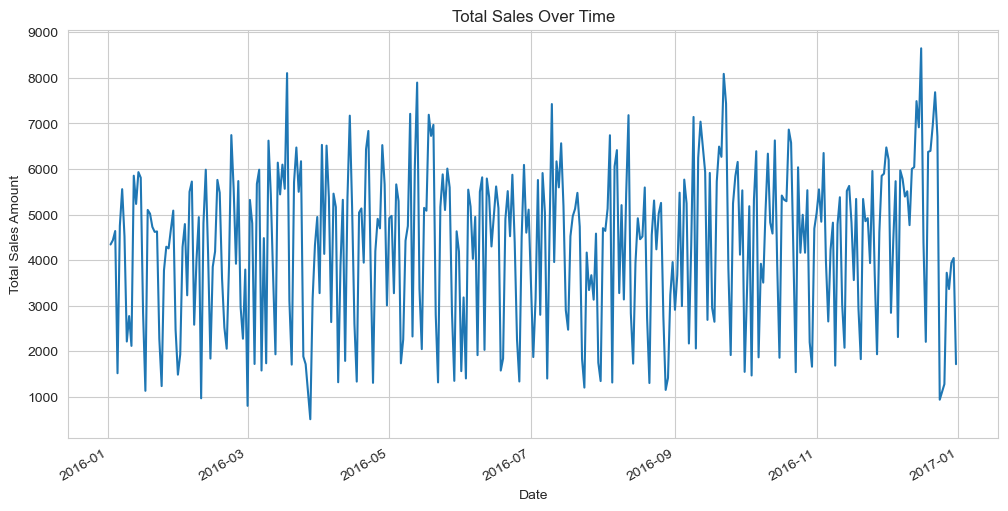

In [159]:
#Total sales over time

plt.figure(figsize=(12,6))
sales_over_time = df_copy.groupby('Date')['Sales_Amount'].sum()
sales_over_time.plot()
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales Amount")
plt.show()

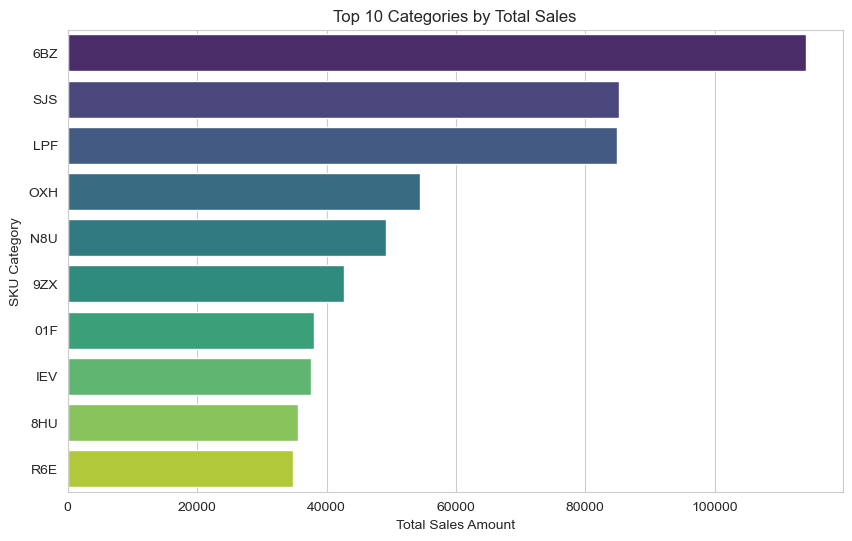

In [160]:
#Top 10 categories by Revenue
plt.figure(figsize=(10,6))
top_categories = df_copy.groupby('SKU_Category')['Sales_Amount'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")
plt.title("Top 10 Categories by Total Sales")
plt.xlabel("Total Sales Amount")
plt.ylabel("SKU Category")
plt.show()

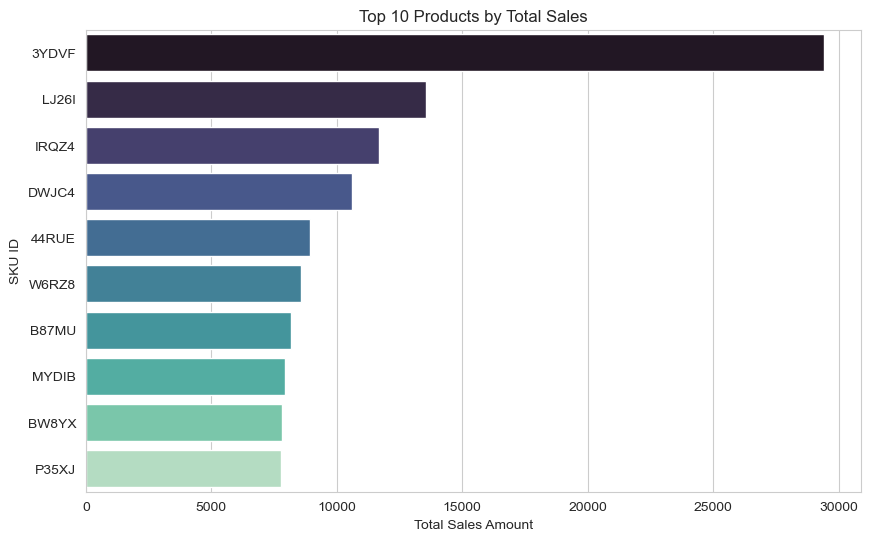

In [161]:
#Top 10 products by revenue
plt.figure(figsize=(10,6))
top_products = df_copy.groupby('SKU')['Sales_Amount'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette="mako")
plt.title("Top 10 Products by Total Sales")
plt.xlabel("Total Sales Amount")
plt.ylabel("SKU ID")
plt.show()

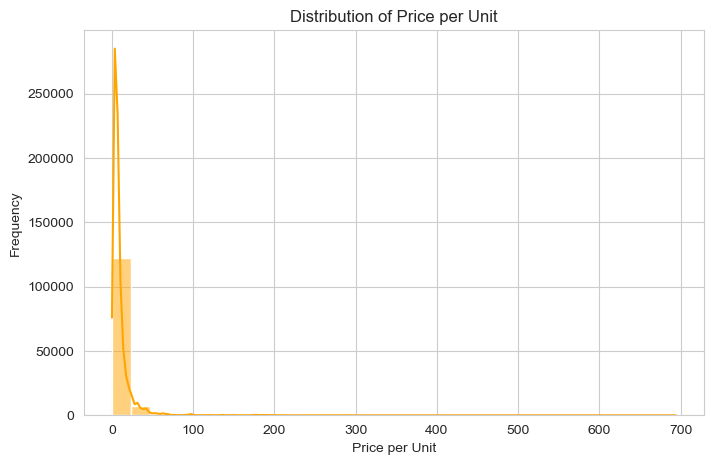

In [162]:
# Distribution of Price per Unit
plt.figure(figsize=(8,5))
sns.histplot(df_copy['Price_per_Unit'], bins=30, kde=True, color='orange')
plt.title("Distribution of Price per Unit")
plt.xlabel("Price per Unit")
plt.ylabel("Frequency")
plt.show()

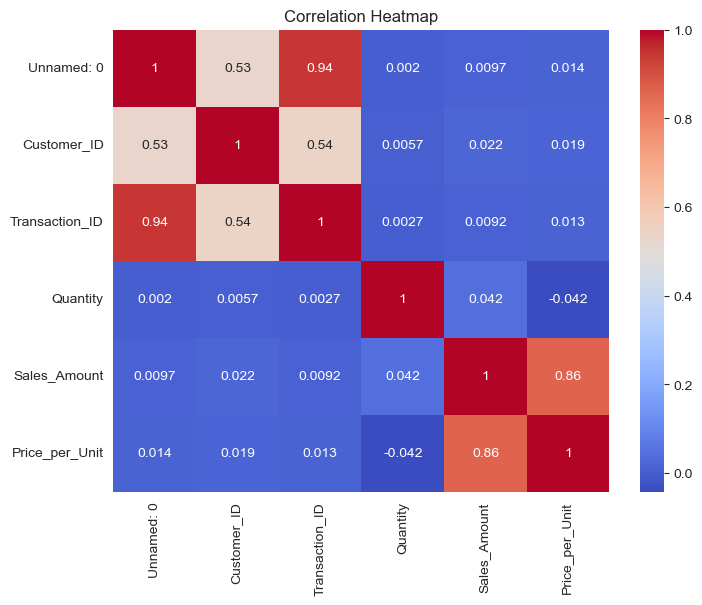

In [163]:
# Correlation Heatmap (numerical columns)
plt.figure(figsize=(8,6))
sns.heatmap(df_copy.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

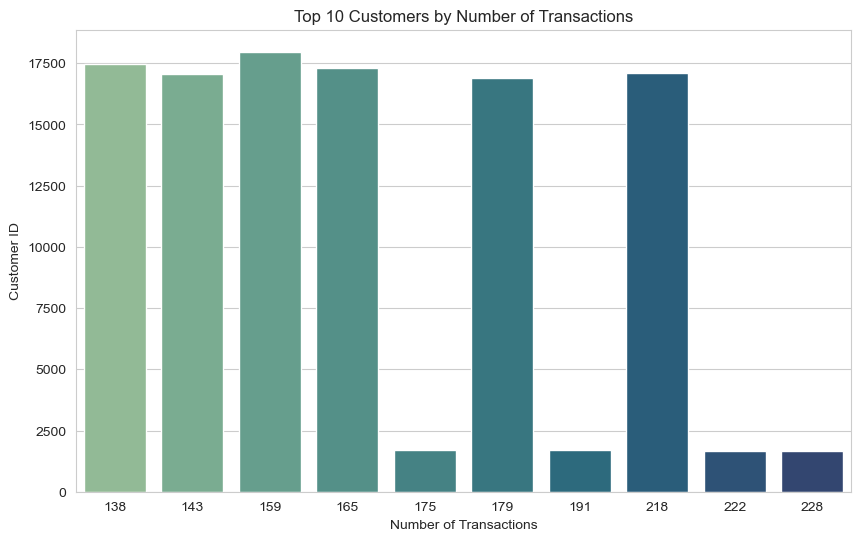

In [164]:
# Top 10 Customers by Number of Transactions
plt.figure(figsize=(10,6))
top_customers_freq = df_copy['Customer_ID'].value_counts().head(10)
sns.barplot(x=top_customers_freq.values, y=top_customers_freq.index, palette="crest")
plt.title("Top 10 Customers by Number of Transactions")
plt.xlabel("Number of Transactions")
plt.ylabel("Customer ID")
plt.show()

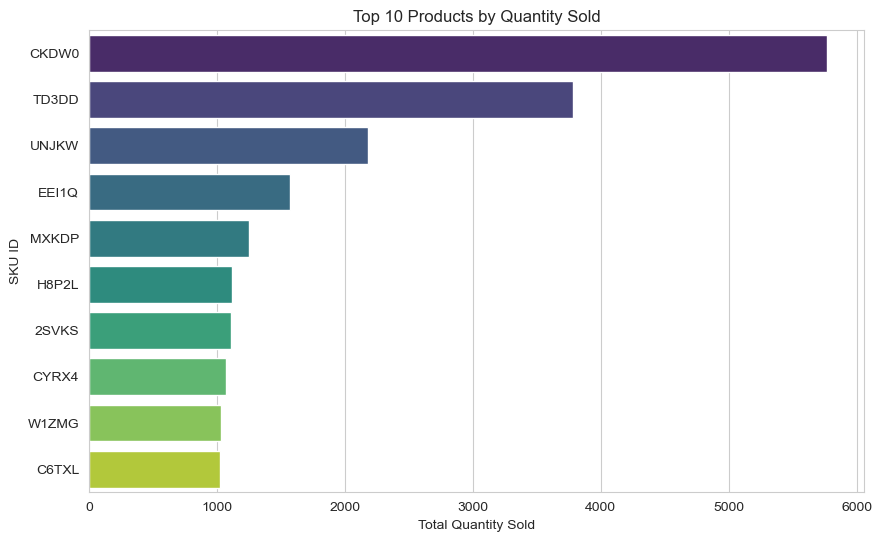

In [165]:

# Top 10 Products by Quantity Sold (instead of Top Customers)
plt.figure(figsize=(10,6))
top_products_qty = df_copy.groupby('SKU')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products_qty.values, y=top_products_qty.index, palette="viridis")
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Total Quantity Sold")
plt.ylabel("SKU ID")
plt.show()

### RFM (Recency, Frequency, Monetary) Analysis
Recency: Days since the last purchase (lower is better).

Frequency: Number of transactions (higher is better).

Monetary: Total spent (higher is better).

In [166]:
# Define a snapshot date (the last day in dataset + 1)
snapshot_date = df_copy['Date'].max() + pd.Timedelta(days=1)

In [167]:
# Group by Customer
rfm = df_copy.groupby('Customer_ID').agg({
    'Date': lambda x: (snapshot_date - x.max()).days,   # Recency
    'Transaction_ID': 'nunique',                       # Frequency
    'Sales_Amount': 'sum'                              # Monetary
})

# Rename columns
rfm.rename(columns={'Date': 'Recency',
                    'Transaction_ID': 'Frequency',
                    'Sales_Amount': 'Monetary'}, inplace=True)

rfm.head()


,Recency,Frequency,Monetary
Customer_ID,,,
1,345,1,16.29
2,196,2,22.77
3,335,1,10.92
4,55,2,33.29
5,121,5,78.82


In [168]:
# Score each metric from 1 (low) to 4 (high) using quartiles
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])

# Combine into one RFM Score
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score','F_Score','M_Score']].astype(int).sum(axis=1)

rfm.head()


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
Customer_ID,,,,,,,,
1,345,1,16.29,1,1,2,112,4
2,196,2,22.77,2,3,2,232,7
3,335,1,10.92,1,1,2,112,4
4,55,2,33.29,3,3,3,333,9
5,121,5,78.82,3,4,4,344,11


### Interpret RFM
Customers with high scores (9–12) → VIP / Champions

Mid-range scores → Loyal, At Risk, etc.

Low scores → Lost or One-Time Buyers

In [169]:
def rfm_segment(df):
    if df['RFM_Score'] >= 9:
        return 'Champions'
    elif df['RFM_Score'] >= 6:
        return 'Loyal Customers'
    else:
        return 'At Risk/Churn'

rfm['Segment'] = rfm.apply(rfm_segment, axis=1)
rfm['Segment'].value_counts()


Champions          8335
Loyal Customers    8040
At Risk/Churn      6250
Name: Segment, dtype: int64

### Average Transaction Value (ATV)

In [170]:
# Remove rows with missing key fields 
df_copy = df_copy.dropna(subset=['Sales_Amount', 'Transaction_ID', 'Date'])

Overall ATV

In [171]:
overall_atv = df_copy['Sales_Amount'].sum() / df_copy['Transaction_ID'].nunique()
print(f"Overall Average Transaction Value (ATV): {overall_atv:.2f}")


Overall Average Transaction Value (ATV): 24.40


ATV by Category

In [172]:
# Compute
cat_sales = df_copy.groupby('SKU_Category')['Sales_Amount'].sum()
cat_txns  = df_copy.groupby('SKU_Category')['Transaction_ID'].nunique()
atv_by_cat = (cat_sales / cat_txns).sort_values(ascending=False)

In [173]:
# Inspect
display(atv_by_cat.to_frame('ATV'))

,ATV
SKU_Category,
3MC,156.967500
S30,148.750714
VD0,142.803333
663,129.221250
2JO,120.600000
...,...
H8J,2.296000
70H,2.163438
HXR,2.052295


#### ATV by Product (Top 15)

,ATV
SKU,
BR7EP,505.590000
HS2ZE,320.480000
RYHT4,314.480000
9KUFC,304.530000
E3T4K,304.386000
NACZN,286.360000
09K06,283.094000
IH9J2,275.271667
3NCL3,270.965000


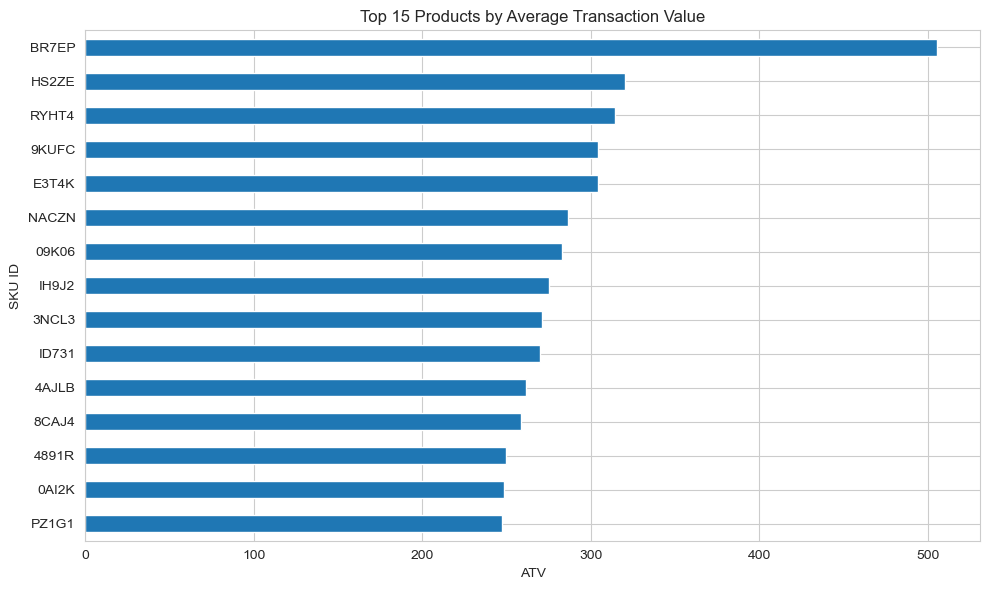

In [174]:
prod_sales = df_copy.groupby('SKU')['Sales_Amount'].sum()
prod_txns  = df_copy.groupby('SKU')['Transaction_ID'].nunique()
atv_by_prod = (prod_sales / prod_txns).sort_values(ascending=False)

top_atv_products = atv_by_prod.head(15)
display(top_atv_products.to_frame('ATV'))

plt.figure(figsize=(10,6))
top_atv_products.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 15 Products by Average Transaction Value')
plt.xlabel('ATV')
plt.ylabel('SKU ID')
plt.tight_layout()
plt.show()


ATV by Month (trend)

,ATV
YearMonth,
2016-01,23.814032
2016-02,24.090033
2016-03,23.686555
2016-04,24.112465
2016-05,23.943945
2016-06,24.623511
2016-07,25.215106
2016-08,25.071405
2016-09,24.754120


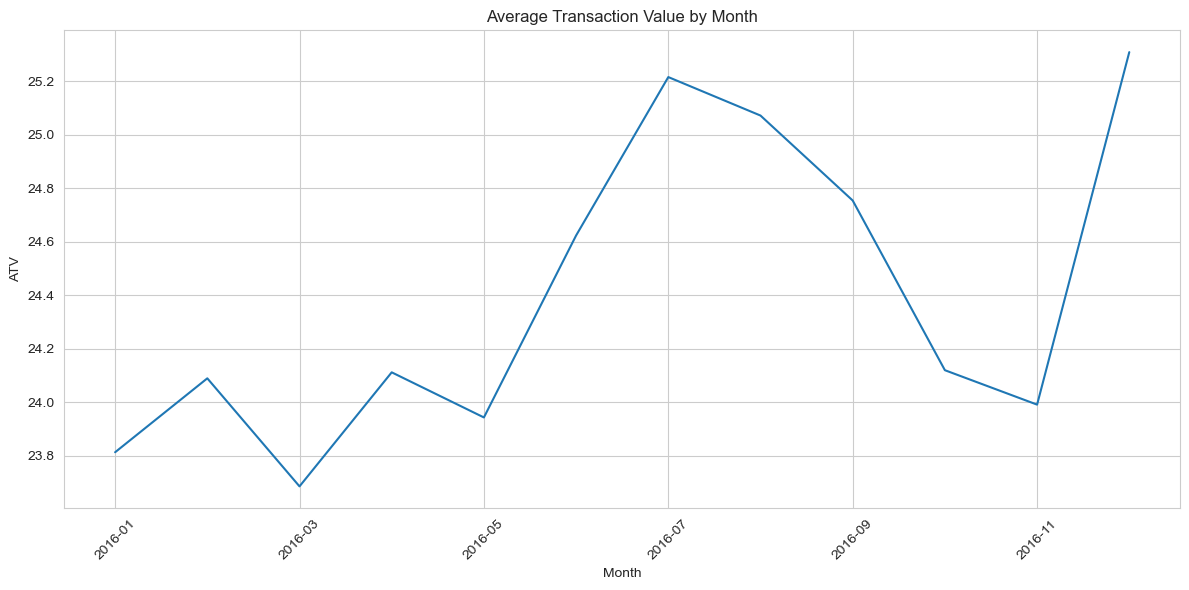

In [175]:
# Create a Year-Month period for grouping
df_copy['YearMonth'] = df_copy['Date'].dt.to_period('M').astype(str)

month_sales = df_copy.groupby('YearMonth')['Sales_Amount'].sum()
month_txns  = df_copy.groupby('YearMonth')['Transaction_ID'].nunique()
atv_by_month = (month_sales / month_txns).sort_index()

display(atv_by_month.to_frame('ATV'))

plt.figure(figsize=(12,6))
atv_by_month.plot()
plt.title('Average Transaction Value by Month')
plt.xlabel('Month')
plt.ylabel('ATV')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Category vs. Product Balance

In [176]:
cat = (df_copy
       .groupby('SKU_Category')
       .agg(revenue=('Sales_Amount','sum'),
            txns=('Transaction_ID','nunique'),
            qty=('Quantity','sum'))
      )
cat['ATV'] = cat['revenue'] / cat['txns']           # Avg Transaction Value
cat['Qty_per_txn'] = cat['qty'] / cat['txns']       # Basket size proxy

# Use medians to segment
rev_med = cat['revenue'].median()
txn_med = cat['txns'].median()
atv_med = cat['ATV'].median()

def segment_row(r):
    if r['txns'] >= txn_med and r['revenue'] < rev_med:
        return 'Low-ticket churners (many txns, low $)'
    if r['txns'] < txn_med and r['revenue'] < rev_med:
        return 'Slow movers (few txns, low $)'
    if r['txns'] < txn_med and r['revenue'] >= rev_med:
        return 'Premium niche (few txns, high $)'
    return 'Workhorse (many txns, high $)'

cat['Segment'] = cat.apply(segment_row, axis=1)
cat.sort_values('revenue', ascending=False).head(12)


,revenue,txns,qty,ATV,Qty_per_txn,Segment
SKU_Category,,,,,,
6BZ,114061.33,1814,2833.660,62.878352,1.562106,"Workhorse (many txns, high $)"
SJS,85142.31,1387,2883.330,61.385948,2.078825,"Workhorse (many txns, high $)"
LPF,84921.91,4649,8210.043,18.266705,1.765980,"Workhorse (many txns, high $)"
OXH,54470.16,2698,3884.670,20.189088,1.439833,"Workhorse (many txns, high $)"
N8U,49119.55,9908,12148.000,4.957565,1.226080,"Workhorse (many txns, high $)"
9ZX,42629.31,1228,2668.000,34.714422,2.172638,"Workhorse (many txns, high $)"
01F,38029.87,1735,3904.000,21.919233,2.250144,"Workhorse (many txns, high $)"
IEV,37618.22,4121,8112.000,9.128420,1.968454,"Workhorse (many txns, high $)"
8HU,35528.14,2320,3555.000,15.313853,1.532328,"Workhorse (many txns, high $)"


Category A is a workhorse (↑txns, ↑revenue).

Category B has many transactions but low revenue per order (low ATV) → consider bundles/upsells.

Category C is a premium niche (high ATV, few txns) → protect margin, targeted promos.

Categories D/E are slow movers → review assortment/placement or run clearance.

In [192]:
Dist_Segment = cat['Segment'].value_counts().reset_index()
Dist_Segment.columns = ['Segment', 'Count']
print(Dist_Segment)


                                  Segment  Count
0           Workhorse (many txns, high $)     83
1           Slow movers (few txns, low $)     82
2        Premium niche (few txns, high $)     11
3  Low-ticket churners (many txns, low $)     11


### Seasonality & Trends

#### Monthly trend (identify peaks)

In [177]:
df_copy['Date'] = pd.to_datetime(df_copy['Date'], errors='coerce')
df_copy['YearMonth'] = df_copy['Date'].dt.to_period('M').astype(str)

monthly_sales = (df_copy
                 .groupby('YearMonth')['Sales_Amount']
                 .sum()
                 .sort_index())
monthly_sales.head(12)  # table


YearMonth
2016-01    117284.11
2016-02    117005.29
2016-03    126225.65
2016-04    134523.44
2016-05    142155.20
2016-06    124767.33
2016-07    124108.75
2016-08    128139.95
2016-09    148277.18
2016-10    134302.37
2016-11    131019.40
2016-12    150229.95
Name: Sales_Amount, dtype: float64

#### Sales peak in Dec; dip in Jan/Feb → holiday seasonality

#### Day‑of‑week pattern (weekend vs weekday)

           total_sales   txns        ATV
DayOfWeek                               
Monday       237095.42   9807  24.176142
Tuesday      247459.13   9621  25.720729
Wednesday    242323.02   9595  25.255135
Thursday     275260.86  10597  25.975357
Friday       266071.94  10417  25.542089
Saturday     169894.13   8003  21.228805
Sunday       139934.12   6642  21.068070


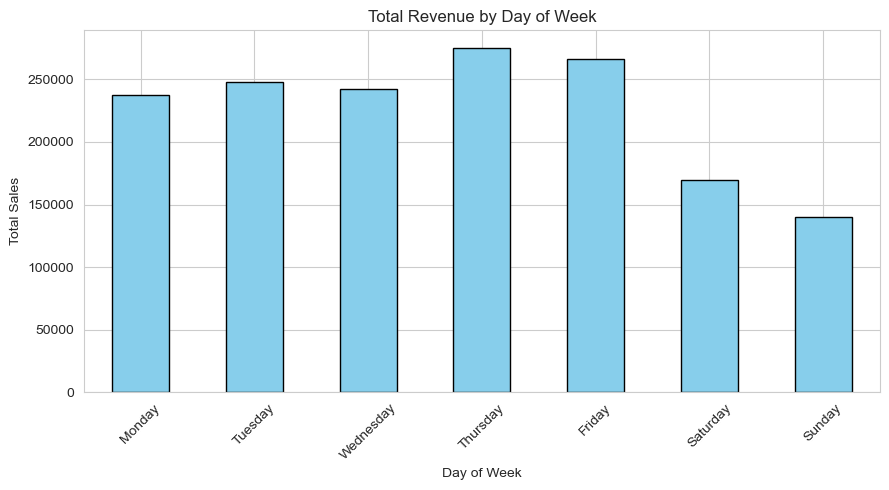

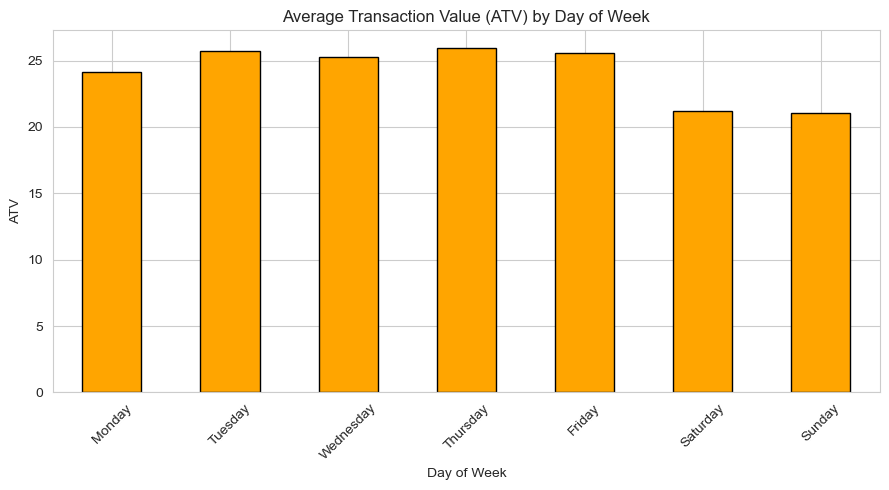

In [178]:
# 1) Make sure Date is datetime and create weekday column
df_copy['Date'] = pd.to_datetime(df_copy['Date'], errors='coerce')
df_copy['DayOfWeek'] = df_copy['Date'].dt.day_name()

# 2) Group by DayOfWeek → total sales + number of transactions

dow = (df_copy
       .groupby('DayOfWeek')
       .agg(total_sales=('Sales_Amount', 'sum'),
            txns=('Transaction_ID', 'nunique'))
      )

# 3) Add Average Transaction Value (ATV)
dow['ATV'] = dow['total_sales'] / dow['txns']

# 4) Reorder days Monday → Sunday
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
dow = dow.reindex(order)

# 5) Show results
print(dow)

# 6) Plot total revenue by weekday
plt.figure(figsize=(9,5))
dow['total_sales'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Revenue by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7) Plot ATV by weekday
plt.figure(figsize=(9,5))
dow['ATV'].plot(kind='bar', color='orange', edgecolor='black')
plt.title('Average Transaction Value (ATV) by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('ATV')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Thursday has the highest revenue; Sunday lowest.
ATV is highest on Thursday → customers buy bigger baskets before weekend.

In [181]:
#Total revenue
total_revenue = df_copy['Sales_Amount'].sum()
print(f"Total Revenue: {total_revenue:,.2f}")


Total Revenue: 1,578,038.62


In [184]:
#Total transactions
total_transactions = df_copy['Transaction_ID'].nunique()
print(f"Total Revenue: {total_transactions:,.2f}")

Total Revenue: 64,682.00


In [193]:
# Define which metric to sort by for each segment
seg_sort = {
    'Low-ticket churners (many txns, low $)': ('txns', False),    # highest txns first
    'Premium niche (few txns, high $)':        ('revenue', False),# highest revenue first
    'Slow movers (few txns, low $)':           ('revenue', False) # choose highest revenue (or change to 'txns')
}

tops = {}

for seg, (sort_col, asc) in seg_sort.items():
    top3 = (cat[cat['Segment'] == seg]
            .sort_values([sort_col, 'revenue'], ascending=[asc, False])
            .head(3)[[sort_col, 'revenue', 'txns', 'ATV', 'Qty_per_txn']])
    tops[seg] = top3

# Display results
for seg, df_out in tops.items():
    print(f"\nTop 3 categories in segment: {seg}")
    display(df_out)



Top 3 categories in segment: Low-ticket churners (many txns, low $)


,txns,revenue,txns,ATV,Qty_per_txn
SKU_Category,,,,,
AEB,461,2171.24,461,4.709848,1.138829
O38,454,1297.31,454,2.857511,1.092511
0KX,440,2044.45,440,4.646477,1.097727



Top 3 categories in segment: Premium niche (few txns, high $)


,revenue,revenue,txns,ATV,Qty_per_txn
SKU_Category,,,,,
PHK,12448.96,12448.96,182,68.400879,1.725275
HTR,9718.24,9718.24,182,53.396923,1.609890
06Z,8619.17,8619.17,208,41.438317,1.041683



Top 3 categories in segment: Slow movers (few txns, low $)


,revenue,revenue,txns,ATV,Qty_per_txn
SKU_Category,,,,,
NVL,2404.98,2404.98,74,32.499730,1.445946
OWA,2316.63,2316.63,50,46.332600,11.980000
NY7,2203.97,2203.97,162,13.604753,1.327160


### Insights

1. Overall Sales Performance

Total revenue: 1,578,038.62

Total transactions: 64,682.00

Average Transaction Value (ATV): 24.40

Overall, the ATV is not reprsent properly the transactions. Average spend per transaction is relatively low. May median will give us a better picture. Also the heatmap is not show any relevent correlation. 

2. Category-Level Insights

Top-performing categories by revenue: 6BZ

Categories with high transactions but low revenue (low ATV): 11 - AEB,O38, 0KX

Categories with few transactions but high revenue (premium niche):11 - PHK,HTR, 06Z

Slow movers (low transactions + low revenue): 82 - NVL, OWA,NY7


3. Product-Level Insights

Top products by quantity sold: CKDW0

Top products by sales amount: 3YDVF

Products with low demand (slow movers): NVL, OWA, NY7


Product CKDWO is the most product by quantity, but does not generate the highest revenue. 3YDVF generates more revenue, which suggests it is a higher-value item. NVL, OWA, and NY7 are slow movers and may need attention (discounting, bundling, or discontinuation).


4. Customer Insights (RFM Analysis)

Share of Champions / Loyal / At-Risk customers:

Champions          8335
Loyal Customers    8040
At Risk/Churn      6250 
Total              22,625

High-value customers (Champions + Loyal) contribute ~72% of total revenue.
Most customers are one-time buyers, while repeat customers spend much more per transaction.

5. Seasonality & Trends

Monthly sales trend: Sales peak in December and dip in January/February, showing holiday seasonality.

Day-of-week pattern: Thursday has the highest revenue, Sunday the lowest. ATV is also highest on Thursday, meaning customers buy bigger baskets before the weekend.

Peak sales periods: Holidays and Thursdyas. 


6. Business Takeaways

 1: Bundle or upsell in low-ATV categories (AEB, O38, 0KX) to increase revenue per order.

 2: Protect premium niches (PHK, HTR, 06Z) with targeted loyalty offers.
 
 3: Reassess slow movers (NVL, OWA, NY7) — either promote heavily or discontinue.

 4: Prepare for peak sales in December with higher inventory and staff planning.

 5: Leverage Thursday’s strong performance with mid-week promotions.

### Summary insights

The analysis of retail store transactions shows a total revenue of 1.58M from more than 64K transactions, with an average transaction value of about 24.40. While some categories generate large numbers of transactions with low revenue per order, others act as premium niches with fewer but higher-value sales. At the product level, CKDW0 leads in volume, but 3YDVF delivers more revenue, highlighting the difference between high-demand and high-value items. Seasonality plays an important role, with December sales peaking and a clear mid-week uplift on Thursdays, suggesting strong holiday and pre-weekend shopping behavior. Slow-moving products and categories (e.g., NVL, OWA, NY7) should be reconsidered, while premium niches should be protected. Overall, the business can grow revenue by focusing on bundling in low-ATV categories, promoting premium products, and aligning resources with seasonal and weekly demand patterns.

In [194]:
df_copy.to_csv("retail_cleaned.csv", index=False)


In [195]:
rfm.to_csv("rfm_segments.csv")